In [1]:
import copy

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pygmo
from scipy.stats import gaussian_kde


In [2]:
# Local
from robustranking.benchmark import Benchmark
from robustranking.comparison import BootstrapComparison, AggregatedComparison, MOBootstrapComparison
from robustranking.utils.plots import *
from robustranking.utils.multiobjective import fast_non_dominated_sorting, dominates

In [3]:
df = pd.read_csv("./Rundata/sc2023-detailed-results/results2023_main_detailed.csv")
del df["vresult"]
df = df.set_index("hash").unstack().reset_index()
# 
# df["solver"] = df["solver"] + df["configuration"]
# df["solved"] = df["status"] == "complete"
# df = df[["solver","benchmark", "cpu time", "solved"]]
# df = df.rename(columns={"cpu time": "PAR2"})
df["solved"] = df[0] <= 5000
df = df.rename(columns={0:"PAR2"})
competition = Benchmark()

competition.from_pandas(df, "level_0", "hash", ["PAR2", "solved"])
competition.show_stats()

algorithms       42
instances       400
objectives        2
values        33600
complete       True
dtype: object

In [4]:
default_comparison = AggregatedComparison(competition,
                                          minimise={"PAR2": True, "solved": False},
                                          aggregation_method={"PAR2": np.mean, "solved": np.sum})

In [5]:
default_comparison.get_ranking()

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/Experiments/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")


PAR2              solved       
objective                               rank        score   rank  score
algorithm                                                              
AMSAT_                                    17  4116.228748     18  249.0
BreakID-kissat-low.sh                     37  4913.321305     37  208.0
CaDiCaL_vivinst                           12  4048.626273     14  253.0
Cadical_ESA                               15  4085.341381     16  252.0
Cadical_rel_1.5.3.Scavel                  14  4050.951635     13  255.0
IsaSAT                                    41  6821.783566     41  141.0
Kissat_Inc_ESA                            35  4794.273825     35  225.0
Kissat_MAB_Binary                         34  4753.712773     34  225.0
Kissat_MAB_Conflict                       22  4323.330001     20  247.0
Kissat_MAB_Conflict+                      28  4610.935490     28  233.0
Kissat_MAB_DeepWalk+                      26  4577.746519     27  233.0
Kissat_MAB_ESA                            30  4663.629649     31  228.0
Kissat_MAB_Rephases                       21  4311.355796     22  246.0
Kissat_MAB_prop                            3  3614.432240      3  270.0
Kissat_MAB_prop-no_sym                     4  3652.444652      4  267.0
Kissat_MAB_prop_pr-no_sym                  2  3596.729034      2  272.0
MapleCaDiCaL_LBD-990_275                   7  3952.537767     10  257.0
MapleCaDiCaL_LBD-990_500                  10  4001.530451     11  257.0
MapleCaDiCaL_PPD-500_500                   6  3933.512050      6  260.0
MapleCaDiCaL_PPD-950_950                   9  3997.859218     12  257.0
MergeSat-bve_gates                        29  4651.727691     29  229.0
MergeSat-bve_semgates                     27  4591.076727     26  233.0
MergeSat-thread1                          33  4750.552027     32  228.0
MiniSat+XorEngine                         42  7961.171104     42   86.0
PReLearn-kissat-PReLearn-kissat.sh         8  3959.366835      8  258.0
PReLearn-kissat-PReLearn-tern-kissat.sh   16  4095.188392      7  259.0
ReEncode-kissat-ReEncode-pair-kissat.sh   11  4033.144613      9  257.0
SBVA-sbva_cadical                          1  3274.011856      1  284.0
SBVA-sbva_kissat                           5  3882.653697      5  262.0
SeqFROST                                  19  4222.914778     19  248.0
SeqFROST-ERE-All                          20  4254.857862     21  247.0
SeqFROST-NoExtend                         18  4180.952423     17  251.0
hKis-psids                                40  6140.756046     40  166.0
hKis-sat_psids                            38  5518.762355     38  194.0
hKis-unsat                                36  4862.975502     36  219.0
hKissatInc-unsat                          39  5797.426677     39  181.0
kissat-3.1.0                              13  4050.737971     15  253.0
kissat-hywalk-exp                         24  4548.896345     25  234.0
kissat-hywalk-exp-gb                      31  4663.669084     33  228.0
kissat-hywalk-gb                          25  4555.190770     24  235.0
kissat_incsp                              32  4732.047579     30  228.0
tabularasat-1.0.0                         23  4434.802071     23  239.0

## SO ranking

In [6]:
socomparison = BootstrapComparison(competition.filter(objectives="solved"),
                                 alpha=0.05,
                                 minimise=False,
                                 bootstrap_runs=10000,
                                 aggregation_method=np.sum)

ranking = socomparison.get_ranking().sort_values(["group", "ranked 1st"], ascending=[True, False])
ranking

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/Experiments/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")


,group,ranked 1st,group wins,remaining
algorithm,,,,
SBVA-sbva_cadical,1,0.8943,0.0240,0.1057
Kissat_MAB_prop_pr-no_sym,1,0.0735,0.0218,0.0322
Kissat_MAB_prop,1,0.0315,0.2342,0.0007
Kissat_MAB_prop-no_sym,1,0.0007,0.7200,0.0000
SBVA-sbva_kissat,2,0.0000,0.0016,0.0000
AMSAT_,2,0.0000,0.1411,0.0000
CaDiCaL_vivinst,2,0.0000,0.0096,0.0000
Cadical_ESA,2,0.0000,0.0258,0.0000
Cadical_rel_1.5.3.Scavel,2,0.0000,0.0029,0.0000


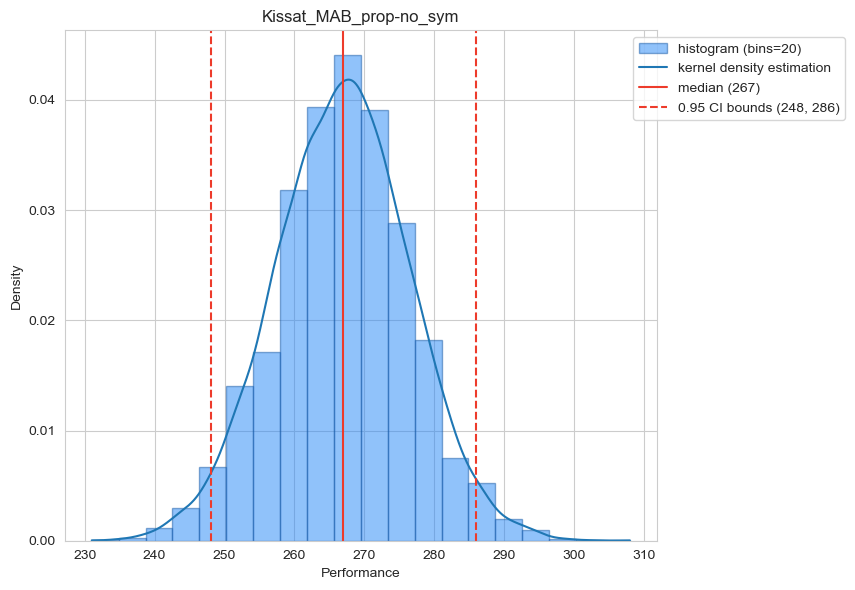

In [7]:
plot_distribution(socomparison, "Kissat_MAB_prop-no_sym")

SBVA-sbva_cadical vs Kissat_MAB_prop-no_sym: 0.0284


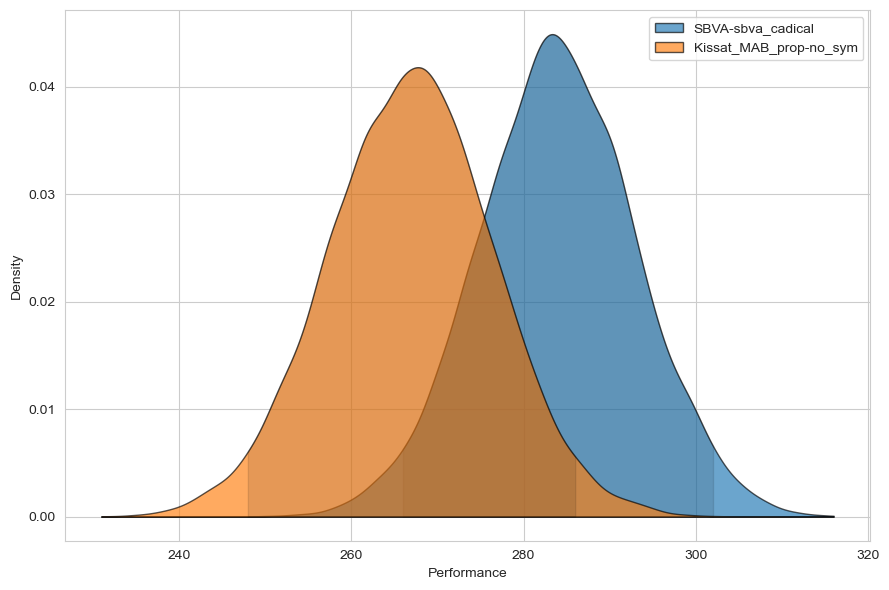

SBVA-sbva_cadical vs AMSAT_: 0.0


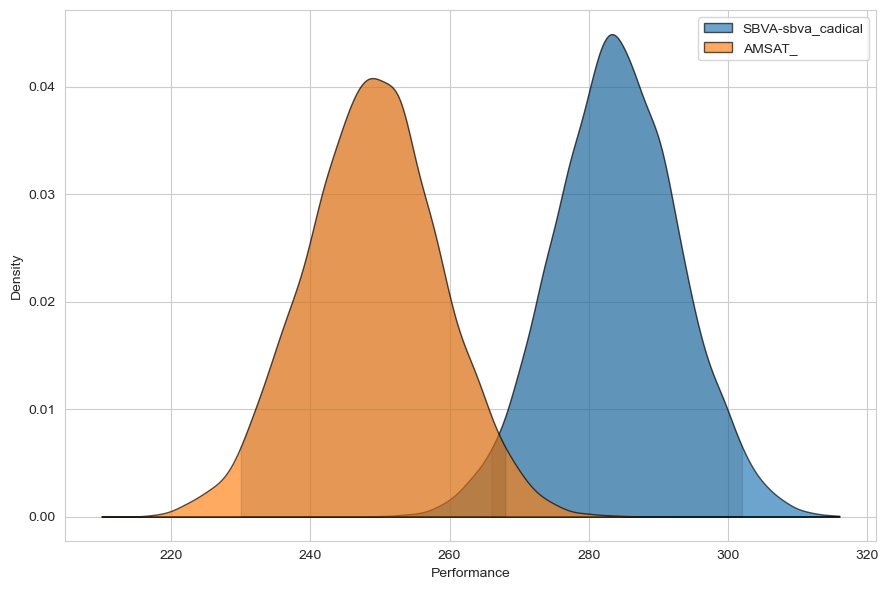

In [8]:


plot_distributions_comparison(socomparison, ["SBVA-sbva_cadical", "Kissat_MAB_prop-no_sym"])
plot_distributions_comparison(socomparison, ["SBVA-sbva_cadical", "AMSAT_"])

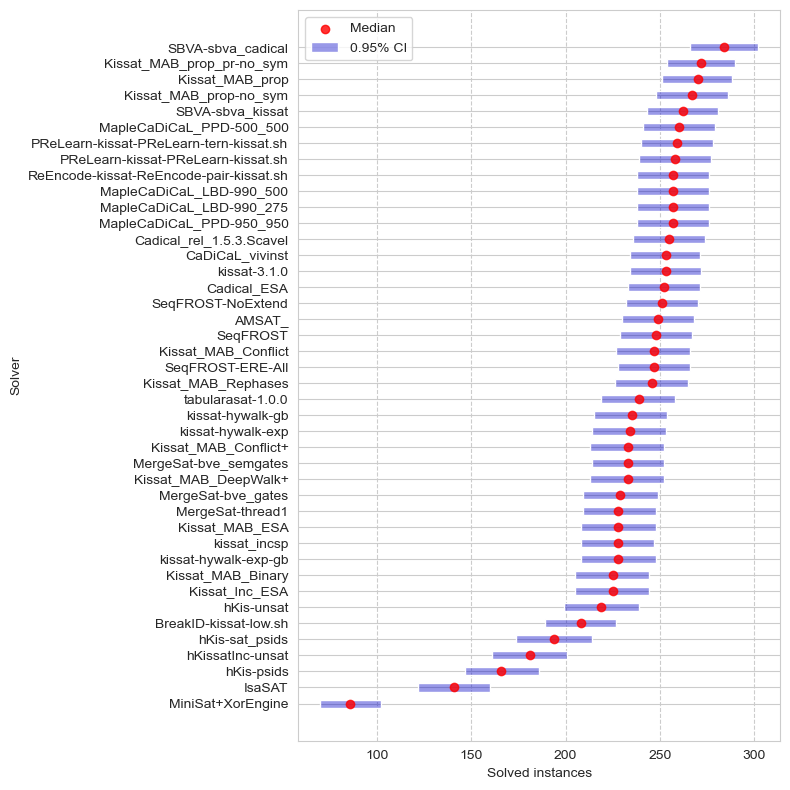

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_ci_list(socomparison, objective="solved", ax=ax)
ax.set_xlabel("Solved instances")
plt.tight_layout()
plt.show()

# MO Ranking

In [11]:
comparison = MOBootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise={"PAR2": True, "solved": False},
                                 bootstrap_runs=10000,
                                 aggregation_method={"PAR2": np.mean, "solved": np.sum})

In [13]:
%time bsrank = comparison.get_ranking()

CPU times: user 1min 15s, sys: 335 ms, total: 1min 15s
Wall time: 1min 15s


In [14]:
def pareto_line(points: np.ndarray, maxima: list[float | int]):
    points = points[points.argsort(axis=0)[:,0],:]
    line = [[points[0, 0], maxima[1]]]
    for i, (x, y) in enumerate(points):
        line.append([x, y])
        if i+1 < len(points):
            line.append([points[i+1,0], y])
        else:
            line.append([maxima[0], y])
    return np.array(line)

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_82461/3645168323.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  ddf = ddf.merge(bsrank, left_index=True, right_index=True)


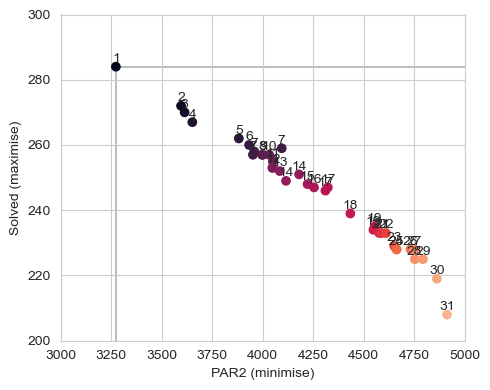

In [15]:
ddf = default_comparison.get_ranking().sort_values(("PAR2", "rank"))
ddf = ddf.merge(bsrank, left_index=True, right_index=True)
fig, ax = plt.subplots(1,1,figsize=(5,4))

points = ddf[[("PAR2", "score"), ("solved", "score")]].to_numpy()
points[:, 1] = -points[:, 1]
fronts , _, _, ndr = fast_non_dominated_sorting(points)
plt.scatter(ddf[("PAR2","score")], ddf[("solved","score")], c=ndr)
# for algo, row in ddf.iterrows():
#     # print(row[("PAR2","score")], row[("solved","score")])
#     plt.text(row[("PAR2","score")], row[("solved","score")], f"{row['group']:.0f}", clip_on=True)

for i, (algo, row) in enumerate(ddf.iterrows()):
    plt.text(row[("PAR2","score")], row[("solved","score")]+0.5, f"{ndr[i]+1}", clip_on=True, va="bottom", ha="center")

for algindex in np.argwhere(ndr == 0):
    iloc = algindex[0]
    series = ddf.iloc[iloc]
    # print(series.name)
    # print(series[("PAR2","score")], series[("solved","score")], series.name)
    #plt.text(series[("PAR2","score")], series[("solved","score")], series.name)
#plt.title("SAT competition 2016 - main track")

for i, front in enumerate(fronts[:1]):
    front_points = points[front, :]
    line = pareto_line(front_points, np.max(points, axis=0))
    line[:, 1] *= -1
    plt.plot(*line.T, color="grey", zorder=0, alpha=0.5)

plt.xlim(3000, 5000)
plt.xlabel("PAR2 (minimise)")
plt.ylim(200, 300)
plt.ylabel("Solved (maximise)")
plt.tight_layout()
plt.savefig("sat2023front.pdf")
plt.show()

In [16]:
bsrank["group"]

algorithm
SBVA-sbva_cadical                          1
Kissat_MAB_prop                            1
Kissat_MAB_prop-no_sym                     1
Kissat_MAB_prop_pr-no_sym                  1
kissat-3.1.0                               2
SeqFROST-ERE-All                           2
SeqFROST                                   2
ReEncode-kissat-ReEncode-pair-kissat.sh    2
PReLearn-kissat-PReLearn-tern-kissat.sh    2
PReLearn-kissat-PReLearn-kissat.sh         2
MapleCaDiCaL_PPD-950_950                   2
MapleCaDiCaL_PPD-500_500                   2
SeqFROST-NoExtend                          2
MapleCaDiCaL_LBD-990_275                   2
Kissat_MAB_Rephases                        2
Kissat_MAB_Conflict                        2
Cadical_rel_1.5.3.Scavel                   2
Cadical_ESA                                2
CaDiCaL_vivinst                            2
AMSAT_                                     2
SBVA-sbva_kissat                           2
MapleCaDiCaL_LBD-990_500                   2


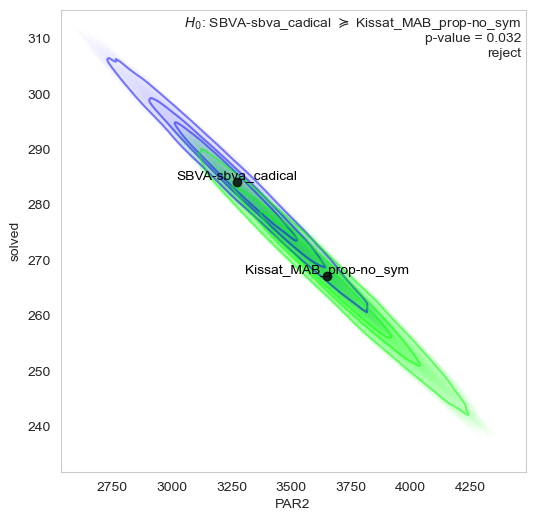

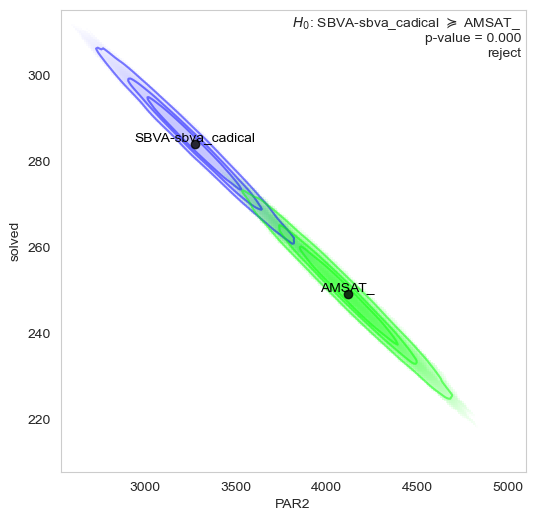

In [41]:
for algorithms in [
    ["SBVA-sbva_cadical", "Kissat_MAB_prop-no_sym"],
    ["SBVA-sbva_cadical", "AMSAT_"]
]:
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_ci_density_estimations(comparison, algorithms, show_names=True, ax=ax)
    
    p_value = comparison.statistical_test(algorithms[0], algorithms[1])
    text = f"$H_0$: {algorithms[0]} $\succeq$ {algorithms[1]}\np-value = {p_value:.3f}\n{'reject' if p_value < 0.05 else 'accept'}"
    ax.text(0.99, 0.99, text, transform=ax.transAxes, va="top", ha="right")
    plt.show()

Text(0, 0, '$H_0$: SBVA-sbva_cadical $\\succeq$ AMSAT_\np-value = 0.000')

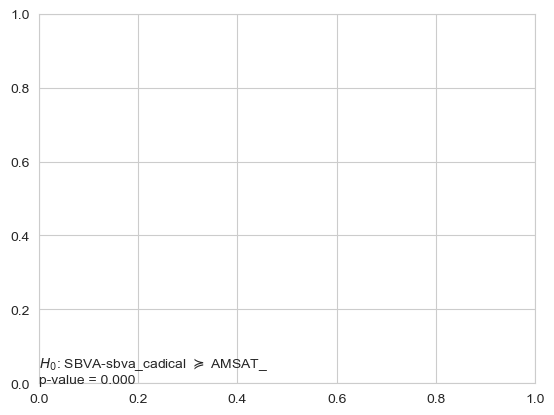